In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 189s 11us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
from keras.models import Sequential

## SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 17s 106ms/step - loss: 0.6630 - acc: 0.5928 - val_loss: 0.7220 - val_acc: 0.5306
Epoch 2/10
157/157 [==============================] - 16s 105ms/step - loss: 0.4430 - acc: 0.8073 - val_loss: 0.4018 - val_acc: 0.8298
Epoch 3/10
157/157 [==============================] - 17s 106ms/step - loss: 0.2918 - acc: 0.8839 - val_loss: 0.3993 - val_acc: 0.8296
Epoch 4/10
157/157 [==============================] - 17s 105ms/step - loss: 0.2051 - acc: 0.9222 - val_loss: 0.4412 - val_acc: 0.8142
Epoch 5/10
157/157 [==============================] - 17s 107ms/step - loss: 0.1276 - acc: 0.9564 - val_loss: 0.4299 - val_acc: 0.8402
Epoch 6/10
157/157 [==============================] - 17s 106ms/step - loss: 0.0774 - acc: 0.9756 - val_loss: 0.4925 - val_acc: 0.8302
Epoch 7/10
157/157 [==============================] - 17s 108ms/step - loss: 0.0821 - acc: 0.9698 - val_loss: 0.5710 - val_acc: 0.8160
Epoch 8/10
157/157 [==============================] - 1

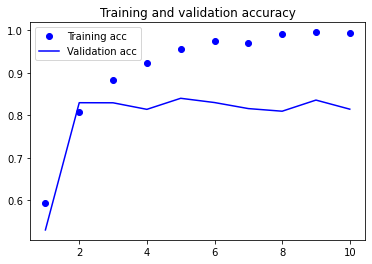

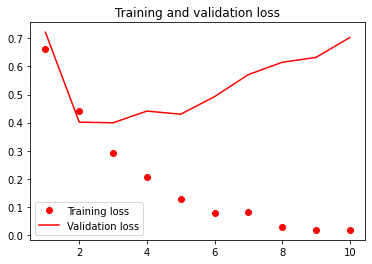

In [6]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [7]:
## LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 35s 222ms/step - loss: 0.5018 - acc: 0.7653 - val_loss: 0.3974 - val_acc: 0.8344
Epoch 2/10
157/157 [==============================] - 36s 227ms/step - loss: 0.2845 - acc: 0.8878 - val_loss: 0.2971 - val_acc: 0.8850
Epoch 3/10
157/157 [==============================] - 35s 225ms/step - loss: 0.2280 - acc: 0.9129 - val_loss

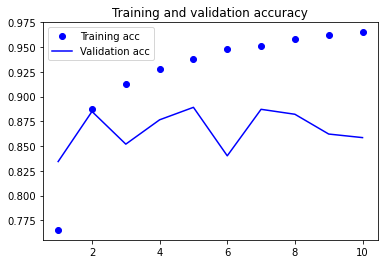

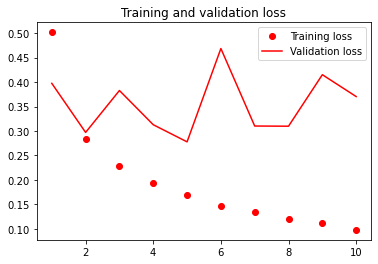

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [2]:
# 双向RNN
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 166s 1s/step - loss: 0.5102 - acc: 0.7544 - val_loss: 0.4634 - val_acc: 0.8222
Epoch 2/10
157/157 [==============================] - 148s 940ms/step - loss: 0.3424 - acc: 0.8723 - val_loss: 0.4109 - val_acc: 0.8462
Epoch 3/10
157/157 [==============================] - 152s 968ms/step - loss: 0.2641 - acc: 0.9028 - val_

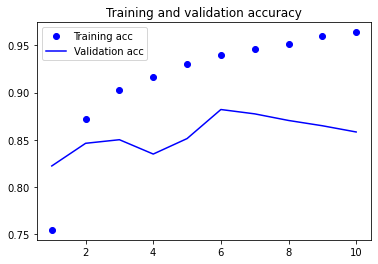

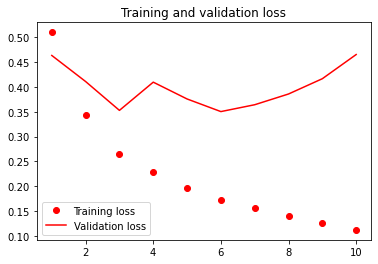

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()